## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [70]:
from sklearn.datasets import load_boston

In [71]:
data = load_boston()

In [72]:
X, Y = data['data'], data['target']

In [73]:
# X[:, 5]

In [74]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [75]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [76]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [77]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [78]:
import random

In [79]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is -15.620257785469079, best_b is -46.91266516938537, loss is 28438.87843615957
when time is 50, best_k is -8.614974698863612, best_b is -8.597760043613995, loss is 7469.659960409861
when time is 100, best_k is -4.2387928650971185, best_b is -4.228012233637703, loss is 2982.8590330275397
when time is 150, best_k is -1.4894121113002323, best_b is -1.4826737207371523, loss is 1212.8213327543624
when time is 200, best_k is 0.23791431536307117, best_b is 0.2421131269633111, loss is 514.7659102767102
when time is 250, best_k is 1.323124714151597, best_b is 1.325728009434552, loss is 239.6113464764377
when time is 300, best_k is 2.0049191864990696, best_b is 2.0065200824252925, loss is 131.24075628790604
when time is 350, best_k is 2.433263499309283, best_b is 2.434234627642726, loss is 88.61391571693788
when time is 400, best_k is 2.7023751711671093, best_b is 2.702950641604074, loss is 71.88175177805522
when time is 450, best_k is 2.8714473165517096, best_b is 2.8717

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

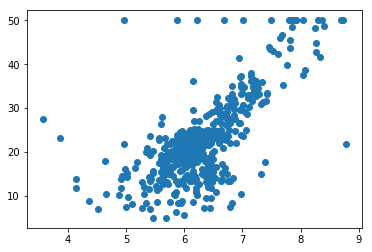

In [82]:
draw_rm_price()

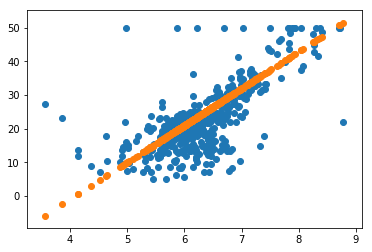

In [83]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [84]:
from collections import defaultdict

In [85]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [86]:
price = defaultdict(int)

In [87]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [88]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [89]:
def example(f, arg):
    return f(arg)

In [90]:
def add_ten(num):
    return num + 10

In [91]:
def mul_ten(num):
    return num * 10 

In [92]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [93]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [94]:
def some_funcion_1(): 
    print('I am function 1')

In [95]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [96]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [97]:
from functools import wraps

In [98]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [99]:
def add_ten(n): return n + 10

In [100]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [101]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [102]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [103]:
add_twenty(9)

29

#### ③ Cutting Problem

In [104]:
solution = {}

In [105]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [106]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [107]:
r(10)

30

In [108]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [109]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [110]:
#r(105)

In [111]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [112]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [113]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [114]:
#r(20)

In [115]:
#r(105)

In [116]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [117]:
r(105)

332

In [118]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [119]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r>

In [120]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [121]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [122]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [123]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
        if y_i < y_hat_i:
            gradient += x_i
        else:
            gradient -= x_i
            
    return 1 / n * gradient

In [124]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
        if y_i < y_hat_i:
            gradient += 1
        else:
            gradient -= 1
    
    return 1 / n * gradient

In [125]:
try_times = 10000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.2

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)    
    
    if current_loss < min_loss:
        
        min_loss = current_loss
        
        print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = b + (-1 * b_gradient )* rate  # b与偏导方向相反

when time is 0, best_k is 92.63394277162223, best_b is 34.92334862665271, loss is 594.5610044810561
when time is 1, best_k is 91.37701589415187, best_b is 34.72334862665271, loss is 586.4616786045199
when time is 2, best_k is 90.1200890166815, best_b is 34.523348626652705, loss is 578.3623527279813
when time is 3, best_k is 88.86316213921114, best_b is 34.3233486266527, loss is 570.2630268514451
when time is 4, best_k is 87.60623526174078, best_b is 34.1233486266527, loss is 562.1637009749082
when time is 5, best_k is 86.34930838427042, best_b is 33.9233486266527, loss is 554.0643750983704
when time is 6, best_k is 85.09238150680005, best_b is 33.723348626652694, loss is 545.9650492218342
when time is 7, best_k is 83.83545462932969, best_b is 33.52334862665269, loss is 537.8657233452968
when time is 8, best_k is 82.57852775185933, best_b is 33.32334862665269, loss is 529.7663974687599
when time is 9, best_k is 81.32160087438896, best_b is 33.123348626652685, loss is 521.6670715922238
w

when time is 341, best_k is 0.6863241945469415, best_b is 17.300423725467077, loss is 6.299187205545552
when time is 342, best_k is 0.6912898071951629, best_b is 17.29014704562518, loss is 6.29857913056075
when time is 343, best_k is 0.6912000838750048, best_b is 17.27907985194929, loss is 6.297969425883326
when time is 344, best_k is 0.6961656965232261, best_b is 17.268803172107393, loss is 6.297400234055574
when time is 345, best_k is 0.696075973203068, best_b is 17.257735978431505, loss is 6.296787779924896
when time is 346, best_k is 0.6959862498829099, best_b is 17.246668784755617, loss is 6.296185203846571
when time is 347, best_k is 0.7009518625311313, best_b is 17.23639210491372, loss is 6.295608883419719
when time is 348, best_k is 0.7008621392109732, best_b is 17.22532491123783, loss is 6.294996429289048
when time is 349, best_k is 0.7007724158908151, best_b is 17.214257717561942, loss is 6.294400981809829
when time is 350, best_k is 0.7057380285390364, best_b is 17.203981037

when time is 1117, best_k is 2.019556605614157, best_b is 9.177103567364068, loss is 5.862472093307058
when time is 1118, best_k is 2.0196336807129716, best_b is 9.16682688752217, loss is 5.861944012861335
when time is 1119, best_k is 2.019710755811786, best_b is 9.156550207680272, loss is 5.861432521952378
when time is 1120, best_k is 2.024891388222853, best_b is 9.147064041672367, loss is 5.860926504471895
when time is 1121, best_k is 2.0249684633216676, best_b is 9.13678736183047, loss is 5.860398424026172
when time is 1122, best_k is 2.025045538420482, best_b is 9.126510681988572, loss is 5.859870343580464
when time is 1123, best_k is 2.0251226135192963, best_b is 9.116234002146674, loss is 5.859380106632656
when time is 1124, best_k is 2.0303032459303636, best_b is 9.10674783613877, loss is 5.858852835191015
when time is 1125, best_k is 2.030380321029178, best_b is 9.096471156296872, loss is 5.858324754745292
when time is 1126, best_k is 2.0304573961279924, best_b is 9.08619447645

when time is 1747, best_k is 2.9901154988948266, best_b is 3.1288822234904483, loss is 5.564645631015794
when time is 1748, best_k is 3.0039435621359334, best_b is 3.1217675989845195, loss is 5.5641263685457165
when time is 1749, best_k is 2.9889178704363286, best_b is 3.109909891474638, loss is 5.564053530334638
when time is 1750, best_k is 3.0027459336774354, best_b is 3.1027952669687093, loss is 5.563084741149796
when time is 1751, best_k is 3.0023439573928505, best_b is 3.0933091009608042, loss is 5.56266233674646
when time is 1752, best_k is 3.0068392143098466, best_b is 3.0846134487868913, loss is 5.562238878653315
when time is 1753, best_k is 3.00141115106874, best_b is 3.074336768944994, loss is 5.56192429391477
when time is 1754, best_k is 3.0152392143098465, best_b is 3.0672221444390653, loss is 5.561741073251305
when time is 1755, best_k is 3.0002135226102418, best_b is 3.055364436929184, loss is 5.5613321932336035
when time is 1756, best_k is 3.0140415858513485, best_b is 3

when time is 3170, best_k is 4.89941154632579, best_b is -8.63317311247789, loss is 5.064509423666461
when time is 3171, best_k is 4.933909965298122, best_b is -8.634754140145875, loss is 5.064116454136822
when time is 3172, best_k is 4.901196526562944, best_b is -8.647402361489748, loss is 5.064089044504152
when time is 3173, best_k is 4.9356949455352765, best_b is -8.648983389157733, loss is 5.063508544889682
when time is 3175, best_k is 4.937479925772431, best_b is -8.663212638169592, loss is 5.0629006356425466
when time is 3178, best_k is 4.911543562136067, best_b is -8.689299594691331, loss is 5.061973059238021
when time is 3180, best_k is 4.913328542373221, best_b is -8.70352884370319, loss is 5.0615526800757085
when time is 3182, best_k is 4.915113522610375, best_b is -8.717758092715048, loss is 5.061132300913408
when time is 3184, best_k is 4.91689850284753, best_b is -8.731987341726906, loss is 5.060711921751102
when time is 3186, best_k is 4.918683483084684, best_b is -8.7462

when time is 4884, best_k is 6.619615498895013, best_b is -19.128825286391166, loss is 4.730166402681965
when time is 4885, best_k is 6.6185605581835505, best_b is -19.134358883229112, loss is 4.730041092284428
when time is 4886, best_k is 6.622119056207266, best_b is -19.139101966233063, loss is 4.729895273189239
when time is 4887, best_k is 6.621064115495804, best_b is -19.14463556307101, loss is 4.72975283203822
when time is 4888, best_k is 6.624622613519519, best_b is -19.14937864607496, loss is 4.729624143696508
when time is 4889, best_k is 6.623567672808057, best_b is -19.154912242912907, loss is 4.729465475727164
when time is 4890, best_k is 6.622512732096594, best_b is -19.160445839750853, loss is 4.729352110268622
when time is 4891, best_k is 6.62607123012031, best_b is -19.165188922754805, loss is 4.729194346234435
when time is 4892, best_k is 6.625016289408848, best_b is -19.17072251959275, loss is 4.72906385002241
when time is 4893, best_k is 6.628574787432563, best_b is -1

when time is 5530, best_k is 7.154021823005658, best_b is -22.426849001806424, loss is 4.6444877504749655
when time is 5533, best_k is 7.183162929725024, best_b is -22.43712568164832, loss is 4.644481883261882
when time is 5534, best_k is 7.156486645140044, best_b is -22.44661184765623, loss is 4.644115372356263
when time is 5536, best_k is 7.160025775574826, best_b is -22.456098013664135, loss is 4.6435948249453
when time is 5540, best_k is 7.16238308782779, best_b is -22.47586085951394, loss is 4.643224555041505
when time is 5544, best_k is 7.163687435653876, best_b is -22.495623705363744, loss is 4.643045825996631
when time is 5546, best_k is 7.166066091780358, best_b is -22.50510987137165, loss is 4.642682893238735
when time is 5548, best_k is 7.1684447479068405, best_b is -22.514596037379558, loss is 4.642319960480844
when time is 5550, best_k is 7.170823404033323, best_b is -22.524082203387465, loss is 4.641957324819782
when time is 5552, best_k is 7.173094550278382, best_b is -2

when time is 7337, best_k is 8.263872811147735, best_b is -29.327244258723795, loss is 4.5059229382872035
when time is 7339, best_k is 8.267179530515323, best_b is -29.332777855561737, loss is 4.5056977897292105
when time is 7343, best_k is 8.273481506799907, best_b is -29.343845049237625, loss is 4.505637820505935
when time is 7344, best_k is 8.267094550278168, best_b is -29.347797618407586, loss is 4.5056070539560915
when time is 7346, best_k is 8.275273996918484, best_b is -29.352540701411538, loss is 4.505523212454729
when time is 7347, best_k is 8.268887040396745, best_b is -29.3564932705815, loss is 4.505442133120744
when time is 7349, best_k is 8.272193759764333, best_b is -29.36202686741944, loss is 4.505256778308666
when time is 7352, best_k is 8.274193364507415, best_b is -29.370722519593354, loss is 4.505132366204896
when time is 7353, best_k is 8.272886249882909, best_b is -29.373884574929324, loss is 4.505095423689275
when time is 7355, best_k is 8.275755024586466, best_b 

when time is 8265, best_k is 8.652246724191217, best_b is -31.774675088763345, loss is 4.472608780828841
when time is 8268, best_k is 8.651666882293984, best_b is -31.781789713269276, loss is 4.472522826447214
when time is 8270, best_k is 8.651248700475803, best_b is -31.78653279627323, loss is 4.4724954168438735
when time is 8272, best_k is 8.65083051865762, best_b is -31.791275879277187, loss is 4.472472113827028
when time is 8274, best_k is 8.655492178736672, best_b is -31.795228448447148, loss is 4.472372575236362
when time is 8275, best_k is 8.65489889810426, best_b is -31.797599989949124, loss is 4.472342694281337
when time is 8276, best_k is 8.654305617471849, best_b is -31.7999715314511, loss is 4.472315459336334
when time is 8278, best_k is 8.653887435653667, best_b is -31.804714614455055, loss is 4.472288049732997
when time is 8279, best_k is 8.65871075581177, best_b is -31.80629564212304, loss is 4.472278257304024
when time is 8280, best_k is 8.653469253835485, best_b is -31

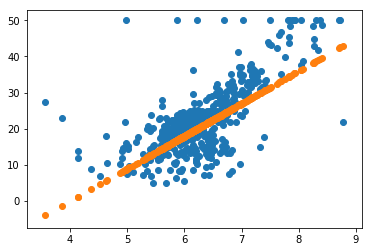

In [126]:
k = 9
b = -36
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [127]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [128]:
solution = dict()

In [129]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = [(string1[:-1], string2), "Del {}".format(string1_tail)]
    elif operation.startswith("Add"):
        solution[(string1, string2)] = [(string1, string2[:-1]), "Add {}".format(string2_tail)]
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = [(string1[:-1], string2[:-1]), "Sub {} -> {}".format(string1_tail, string2_tail)]
    else:
        solution[(string1, string2)] = [(string1[:-1], string2[:-1]), "No Action"]
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [130]:
edit_distance('ABCDE', 'ABCCEF')

2

In [131]:
solution

{('A', 'A'): [('', ''), 'No Action'],
 ('A', 'AB'): [('A', 'A'), 'Add B'],
 ('A', 'ABC'): [('A', 'AB'), 'Add C'],
 ('A', 'ABCC'): [('A', 'ABC'), 'Add C'],
 ('A', 'ABCCE'): [('A', 'ABCC'), 'Add E'],
 ('A', 'ABCCEF'): [('A', 'ABCCE'), 'Add F'],
 ('AB', 'A'): [('A', 'A'), 'Del B'],
 ('AB', 'AB'): [('A', 'A'), 'No Action'],
 ('AB', 'ABC'): [('AB', 'AB'), 'Add C'],
 ('AB', 'ABCC'): [('AB', 'ABC'), 'Add C'],
 ('AB', 'ABCCE'): [('AB', 'ABCC'), 'Add E'],
 ('AB', 'ABCCEF'): [('AB', 'ABCCE'), 'Add F'],
 ('ABC', 'A'): [('AB', 'A'), 'Del C'],
 ('ABC', 'AB'): [('AB', 'AB'), 'Del C'],
 ('ABC', 'ABC'): [('AB', 'AB'), 'No Action'],
 ('ABC', 'ABCC'): [('ABC', 'ABC'), 'Add C'],
 ('ABC', 'ABCCE'): [('ABC', 'ABCC'), 'Add E'],
 ('ABC', 'ABCCEF'): [('ABC', 'ABCCE'), 'Add F'],
 ('ABCD', 'A'): [('ABC', 'A'), 'Del D'],
 ('ABCD', 'AB'): [('ABC', 'AB'), 'Del D'],
 ('ABCD', 'ABC'): [('ABC', 'ABC'), 'Del D'],
 ('ABCD', 'ABCC'): [('ABC', 'ABC'), 'Sub D -> C'],
 ('ABCD', 'ABCCE'): [('ABCD', 'ABCC'), 'Add E'],
 ('ABC

In [132]:
res = dict()
def parse_solution(string1 ,string2, solution):
    left_string1, right_string2 = solution[(string1, string2)][0]
    action = solution[(string1, string2)][1]
    
    res[(string1, string2)] = [(left_string1, right_string2), action]
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [133]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [134]:
res

{('A', 'A'): [('', ''), 'No Action'],
 ('AB', 'AB'): [('A', 'A'), 'No Action'],
 ('ABC', 'ABC'): [('AB', 'AB'), 'No Action'],
 ('ABCD', 'ABCC'): [('ABC', 'ABC'), 'Sub D -> C'],
 ('ABCDE', 'ABCCE'): [('ABCD', 'ABCC'), 'No Action'],
 ('ABCDE', 'ABCCEF'): [('ABCDE', 'ABCCE'), 'Add F']}

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:通过求导/梯度计算，有方向性的拟合，一步一步的靠近目标函数

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gradient意思是下降的程度（函数沿着梯度方向下降最快），Descent表示方向


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:有方向性的变化，而且更快

4. Using the simple words to describe: What's the machine leanring.¶

Ans:通过大量数据的学习，在特定的任务中，机器能提高自身表现，达到预期的目的

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:搜索问题的使用的是递归，重复的子问题还是会进行计算，这样会花费大量的时间，而动态规划将子问题的结果保留，避免了重复执行,节约很多时间

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:有些问题使用动态规划更简单，当然使用动态规划，特定的场景使用不同的方法

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:斐波那契数列，最短路径，旅行商问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:拼写纠错，DNA序列相似度，可拆分性的商品买卖

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans：Overlapping Subproblems：分析子问题的重复性，Overlapping Computing：将子问题的结果存储，便于重复调用
Parse Solution：对方法进行一步一步解析

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:1.将问题划分为子问题进行存储消耗大量的内存 2.对于不同的问题，没有通用的格式进行调用，需要根据情况构建方法解决问题

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [135]:
import random
import matplotlib.pylab as plt
import math

In [136]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

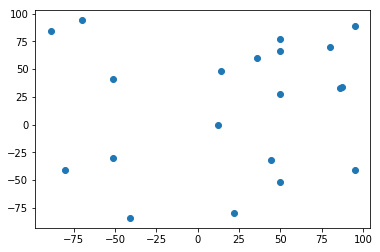

In [137]:
plt.scatter(coordinate_x, coordinate_y)

In [138]:
def get_distance(coord1, coord2):
    """计算两点的坐标"""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

### 1. 先试试一个点出发(贪婪)

In [139]:
#先试试一个点
chosen_p = (-50, 10)
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [140]:
def get_shortest_path(start):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [141]:
shortest_path = get_shortest_path(chosen_p)

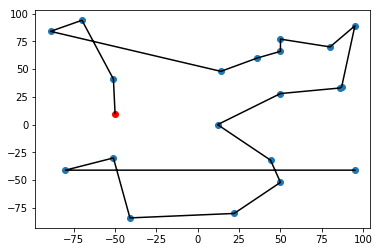

In [142]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
X = [x[0] for x in shortest_path]
Y = [y[1] for y in shortest_path]
plt.plot(X, Y, color="black")

In [143]:
#计算距离
distance = 0
for index, coord in enumerate(shortest_path[:-1]):
    distance += get_distance(shortest_path[index], shortest_path[index + 1])

In [144]:
distance

894.539353436894

### 2.动态规划

In [145]:
import numpy as np

In [146]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]
#先试试一个点
chosen_p = (-50, 10)
coordinate_x.insert(0, chosen_p[0])
coordinate_y.insert(0, chosen_p[1])
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [147]:
coordinate_array = np.array(coordinate_list)

In [148]:
coordinate_array

array([[ -50,   10],
       [  99,  -94],
       [ -48,    0],
       [   7,  -55],
       [ -29,   43],
       [   4,  -36],
       [ -90,   84],
       [-100,   46],
       [ -55,   25],
       [ -20,  -87],
       [ -94,  -36],
       [  58,  -38],
       [ -72,  -76],
       [ -53,  -13],
       [ -34,   71],
       [  66,   55],
       [ -12,   72],
       [  59,  -87],
       [ -76,   96],
       [ -29,  -13],
       [ -24,   -7]])

In [149]:
coordinate_array.shape

(21, 2)

In [150]:
#将两点之间的距离整合起来
distance_array = np.zeros((coordinate_array.shape[0], coordinate_array.shape[0]))

In [151]:
for i in range(coordinate_array.shape[0]):
    for j in range(coordinate_array.shape[0]):
               distance_array[i, j] = get_distance(coordinate_array[i], coordinate_array[j])

In [152]:
distance_array

array([[   0.        ,  181.70580618,   10.19803903,   86.45229899,
          39.11521443,   70.9365914 ,   84.11896338,   61.6116872 ,
          15.8113883 ,  101.53324579,   63.65532185,  118.18629362,
          88.76936408,   23.19482701,   63.0634601 ,  124.42266675,
          72.71863585,  145.91093174,   89.84430978,   31.144823  ,
          31.06444913],
       [ 181.70580618,    0.        ,  174.48495637,   99.92497185,
         187.49133313,  111.30588484,  259.62472918,  243.31255619,
         194.62014284,  119.20570456,  201.52667317,   69.4046108 ,
         171.94475857,  172.23530416,  211.92923347,  152.61061562,
         199.69226325,   40.60788101,  258.31182706,  151.47607072,
         150.65855435],
       [  10.19803903,  174.48495637,    0.        ,   77.78174593,
          47.01063709,   63.2455532 ,   93.91485505,   69.42621983,
          25.96150997,   91.39474821,   58.41232747,  112.60550608,
          79.69943538,   13.92838828,   72.36711961,  126.57408898,


In [161]:
"""
N：坐标点总数量
coordinate_array：坐标数组
distance_array：两点距离数组
dp：动态规划的距离数组
path：每个阶段的下一步的路径
"""
N = coordinate_array.shape[0]
start = 0

In [162]:
class TSP:
    def __init__(self, distance_array, start):
        self.distance_array = distance_array
        self.start = start
        self.path = np.zeros((N, 2 ** N))
        self.dp = np.zeros((N, 2 ** N))
        
    def set_transfer(self, l):
        """将未经过的点位集合转化内数字"""
        s = 0
        for i in range(0, len(l)):
            s += 2 ** l[i]
        return s

    def tsp(self):
        """TSP接口"""
        no_passed_list = [i for i in range(1, N)]
        return self._tsp(self.start, no_passed_list)

    def _tsp(self, init, s):
        """内部实现逻辑"""
        if self.dp[init][self.set_transfer(s)] != 0:
            return self.dp[init][self.set_transfer(s)]
        if len(s) == 0:
            return self.distance_array[init][self.start]

        min_distance = float("inf")

        for i in range(len(s)):
            no_passed_list_copy = s.copy()
            no_passed_list_copy.pop(i)
            distance = self.distance_array[init][s[i]] + self._tsp(s[i], no_passed_list_copy)
            if distance < min_distance:
                min_distance = distance
                next_init = s[i]

        no_passed_transfer_num = self.set_transfer(s)

        self.path[init][no_passed_transfer_num] = next_init
        self.dp[init][no_passed_transfer_num] = min_distance

        return min_distance
        

In [163]:
# 老电脑性能不行。。。
T = TSP(distance_array, 0)
T.tsp()

MemoryError: 

In [164]:
T.path

array([[ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [165]:
num_list = [i for i in range(T.distance_array)]
start = 0
while len(num_list) > 0:
    num_list.pop(num_list.index(start))
    m = T.set_transfer(num_list)
    next = T.path[start][m]
    print(start, '->', next)
    start = next

TypeError: only integer scalar arrays can be converted to a scalar index

In [166]:
tsp

NameError: name 'tsp' is not defined

### 三个起始点

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [167]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

In [168]:
chosen_p1 = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

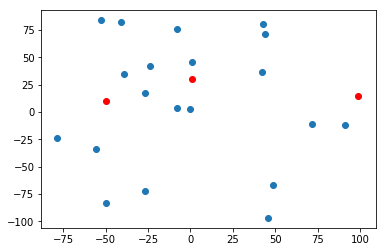

In [169]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

#### 思路： 以三个点来划分三个区域，取两个点中心线平行y轴

In [170]:
chosen_sort = sorted([chosen_p1, chosen_p2, chosen_p3], key = lambda x:x[0])

In [171]:
# 三个点两条分割线
mid_line12 = (chosen_sort[1][0] + chosen_sort[0][0]) // 2
mid_line23 = (chosen_sort[2][0] + chosen_sort[1][0]) // 2
# 点位坐标集合
coordinate_list = [(x, y) for x, y in zip(coordinate_x, coordinate_y)]

In [172]:
#将点位根据分割线分为三部分
coordinate_list_1 = []
coordinate_list_2 = []
coordinate_list_3 = []
for coord in coordinate_list:
    if coord[0] <= mid_line12:
        coordinate_list_1.append(coord)
    elif mid_line12 < coord[0] <= mid_line23:
        coordinate_list_2.append(coord)
    else:
        coordinate_list_3.append(coord)
coordinate_list_2

[(42, 37),
 (44, 71),
 (-24, 42),
 (0, 3),
 (-8, 76),
 (1, 46),
 (43, 81),
 (-8, 4),
 (46, -97),
 (49, -67)]

In [173]:
def get_shortest_path(start,coordinate_list):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [174]:
# 获取最短路径
shortest_path_1 = get_shortest_path(chosen_p1, coordinate_list_1)
shortest_path_2 = get_shortest_path(chosen_p2, coordinate_list_2)
shortest_path_3 = get_shortest_path(chosen_p3, coordinate_list_3)

In [175]:
# 计算路径
distance = 0
for path in [shortest_path_1,shortest_path_2,shortest_path_3]:
    for index, coord in enumerate(path[:-1]):
        distance += get_distance(path[index], path[index + 1])

In [176]:
distance

719.0778192824814

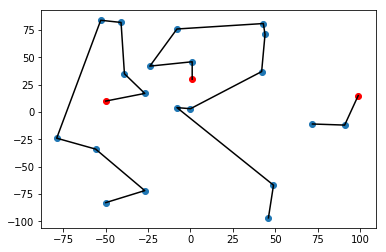

In [177]:
# 画图
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')
X1 = [x[0] for x in shortest_path_1]
Y1 = [y[1] for y in shortest_path_1]
X2 = [x[0] for x in shortest_path_2]
Y2 = [y[1] for y in shortest_path_2]
X3 = [x[0] for x in shortest_path_3]
Y3 = [y[1] for y in shortest_path_3]
plt.plot(X1, Y1, color="black")
plt.plot(X2, Y2, color="black")
plt.plot(X3, Y3, color="black")

shuro